# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: Julia Fangman
#### Github Link: https://github.com/julia-fangman/web-scraping 

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

## Prereqs Installed: 

In [2]:
# Create and activate a Python virtual environment. 
# Before starting the project, try all these imports FIRST
# Address any errors you get running this code cell 
# by installing the necessary packages into your active Python environment.
# Try to resolve issues using your materials and the web.
# If that doesn't work, ask for help in the discussion forums.
# You can't complete the exercises until you import these - start early! 
# We also import pickle and Counter (included in the Python Standard Library).

from collections import Counter
import pickle
import requests
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

!pip list

print('All prereqs installed.')

Package            Version
------------------ -----------
annotated-types    0.6.0
appnope            0.1.4
asttokens          2.4.1
beautifulsoup4     4.12.3
blis               0.7.11
catalogue          2.0.10
certifi            2024.2.2
charset-normalizer 3.3.2
click              8.1.7
cloudpathlib       0.16.0
comm               0.2.2
confection         0.1.4
contourpy          1.2.1
cycler             0.12.1
cymem              2.0.8
debugpy            1.8.1
decorator          5.1.1
executing          2.0.1
fonttools          4.51.0
html5lib           1.1
idna               3.6
ipykernel          6.29.4
ipython            8.23.0
jedi               0.19.1
Jinja2             3.1.3
joblib             1.3.2
jupyter_client     8.6.1
jupyter_core       5.7.2
kiwisolver         1.4.5
langcodes          3.3.0
MarkupSafe         2.1.5
matplotlib         3.8.4
matplotlib-inline  0.1.6
murmurhash         1.0.10
nest-asyncio       1.6.0
nltk               3.8.1
numpy              1.26.4
packagi

## Question 1: 

1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

#### Question 1: Response & Output

In [50]:
import requests
import pickle

url = "https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/"
response = requests.get(url)

if response.status_code == 200:
    article_html = response.text
    
    with open("article_html.pkl", "wb") as f:
        pickle.dump(article_html, f)
    
    print("HTML content saved to article_html.pkl successfully.")
else:
    print("Failed to fetch content from the URL.")


HTML content saved to article_html.pkl successfully.


## Question 2: 

2. Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

#### Question 2 Response & Output:

In [38]:
import pickle
from bs4 import BeautifulSoup

with open("article_html.pkl", "rb") as f:
    article_html = pickle.load(f)

soup = BeautifulSoup(article_html, "html.parser")

print(soup.get_text())




















How Laser Headlights Work | Hackaday




















































































39 captures
22 Mar 2021 - 02 Aug 2023















Feb
MAR
Aug




27




2020
2021
2022







success
fail






















 About this capture






COLLECTED BY



		Organization: Internet Archive


	  Focused crawls are collections of frequently-updated webcrawl data from narrow (as opposed to broad or wide) web crawls, often focused on a single domain or subdomain.




Collection: top_domains-00250




TIMESTAMPS





The Wayback Machine - https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/






Skip to content






Hackaday


Primary Menu

Home
Blog
Hackaday.io
Tindie
Hackaday Prize
Submit
About


Search for:



 March 27, 2021 






How Laser Headlights Work


                130 Comments            

by:
Lewin Day



March 22, 2021








When we think about the onward march of au

## Question 3:

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

#### Question 3 Response & Output:

In [41]:
import pickle
import spacy
from collections import Counter
import string

with open("article_html.pkl", "rb") as f:
    article_html = pickle.load(f)

soup = BeautifulSoup(article_html, "html.parser")
article_content = soup.find("div", class_="entry-content").get_text()
nlp = spacy.load("en_core_web_sm")
doc = nlp(article_content)

# Filter out punctuation and stopwords, and convert tokens to lowercase
tokens = [token.text.lower() for token in doc if token.text.lower() not in string.punctuation and not token.is_stop and not token.is_space]

# Count token frequencies
token_counter = Counter(tokens)

# Get the 5 most frequent tokens
most_common_tokens = token_counter.most_common(5)

# Print the 5 most frequent tokens with their frequencies
print("Top 5 most frequent tokens:")
for token, frequency in most_common_tokens:
    print(f"{token}: {frequency}")

# Print all tokens with their frequencies
print("\nAll tokens with their frequencies:")
for token, frequency in token_counter.items():
    print(f"{token}: {frequency}")


Top 5 most frequent tokens:
laser: 30
headlights: 17
technology: 10
headlight: 10
led: 10

All tokens with their frequencies:
think: 1
onward: 1
march: 1
automotive: 6
technology: 10
headlights: 17
usually: 1
thing: 2
come: 5
mind: 3
engines: 1
fuel: 1
efficiency: 3
switch: 2
electric: 1
power: 3
mean: 1
thousands: 1
engineers: 2
world: 2
working: 1
improve: 1
state: 2
art: 1
lighting: 4
day: 2
sealed: 2
beam: 7
gave: 1
way: 4
modern: 2
designs: 3
regulations: 1
loosened: 1
bulbs: 1
moved: 2
simple: 3
halogens: 1
xenon: 1
hids: 1
recently: 1
leds: 6
new: 3
scene: 1
lasers: 5
laser: 30
bwm: 2
prototype: 1
headlight: 10
assemblies: 1
undergoing: 1
testing: 1
image: 2
brought: 1
phrase: 1
“: 2
”: 2
beams: 5
firing: 1
automobile: 1
obviously: 1
coherent: 1
monochromatic: 1
light: 8
poor: 1
illumination: 2
outside: 1
specific: 1
spot: 2
distance: 1
away: 1
thankfully: 2
eyes: 1
work: 1
instead: 1
consist: 1
solid: 1
diodes: 2
mounted: 1
inside: 3
blue: 1
fired: 1
yellow: 1
phosphor: 3
simil

## Question 4: 

4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

#### Question 4 Response & Output:

In [42]:
import pickle
import spacy
from collections import Counter
import string

with open("article_html.pkl", "rb") as f:
    article_html = pickle.load(f)

soup = BeautifulSoup(article_html, "html.parser")
article_content = soup.find("div", class_="entry-content").get_text()
nlp = spacy.load("en_core_web_sm")
doc = nlp(article_content)

# Filter out punctuation, stopwords, and whitespace, and lemmatize tokens
lemmas = [token.lemma_.lower() for token in doc if token.lemma_ not in string.punctuation and not token.is_stop and not token.is_space]

# Count lemma frequencies
lemma_counter = Counter(lemmas)

# Get the 5 most frequent lemmas
most_common_lemmas = lemma_counter.most_common(5)

# Print the 5 most frequent lemmas with their frequencies
print("Top 5 most frequent lemmas:")
for lemma, frequency in most_common_lemmas:
    print(f"{lemma}: {frequency}")

# Print all lemmas with their frequencies
print("\nAll lemmas with their frequencies:")
for lemma, frequency in lemma_counter.items():
    print(f"{lemma}: {frequency}")


Top 5 most frequent lemmas:
laser: 35
headlight: 26
beam: 12
technology: 10
light: 9

All lemmas with their frequencies:
think: 1
onward: 1
march: 1
automotive: 6
technology: 10
headlight: 26
usually: 1
thing: 3
come: 7
mind: 3
engine: 1
fuel: 1
efficiency: 3
switch: 2
electric: 1
power: 3
mean: 2
thousand: 1
engineer: 2
world: 2
work: 2
improve: 1
state: 2
art: 1
lighting: 4
day: 3
seal: 1
beam: 12
give: 1
way: 4
modern: 2
design: 6
regulation: 1
loosen: 1
bulb: 1
move: 2
simple: 3
halogen: 1
xenon: 1
hids: 1
recently: 1
led: 7
new: 3
scene: 1
laser: 35
headlights: 1
bwm: 2
prototype: 1
assembly: 2
undergo: 1
testing: 1
image: 2
bring: 2
phrase: 1
fire: 2
automobile: 2
obviously: 1
coherent: 1
monochromatic: 1
light: 9
poor: 1
illumination: 2
outside: 1
specific: 1
spot: 2
distance: 1
away: 1
thankfully: 2
eye: 1
instead: 1
consist: 1
solid: 1
diode: 5
mount: 1
inside: 3
blue: 1
yellow: 1
phosphor: 3
similar: 1
white: 2
produce: 1
powerful: 2
vibrant: 1
bounce: 1
reflector: 1
road: 2


## Question 5:

5. Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

#### Question 5 Response & Output: 

In [43]:
def score_sentence_by_token(sentence, interesting_tokens):
    """
    Calculate the score of a sentence based on interesting tokens.
    
    Parameters:
        sentence (str): The input sentence.
        interesting_tokens (list): A list of interesting tokens.
    
    Returns:
        float: The score of the sentence.
    """
    # Tokenize the sentence
    tokens = sentence.split()
    
    # Count the number of interesting tokens in the sentence
    interesting_count = sum(1 for token in tokens if token.lower() in interesting_tokens)
    
    # Calculate the score
    score = interesting_count / len(tokens)
    
    return score

def score_sentence_by_lemma(sentence, interesting_lemmas):
    """
    Calculate the score of a sentence based on interesting lemmas.
    
    Parameters:
        sentence (str): The input sentence.
        interesting_lemmas (list): A list of interesting lemmas.
    
    Returns:
        float: The score of the sentence.
    """
    # Process the sentence with spaCy
    doc = nlp(sentence)
    
    # Lemmatize the tokens and convert them to lowercase
    lemmas = [token.lemma_.lower() for token in doc if token.lemma_ not in string.punctuation and not token.is_stop and not token.is_space]
    
    # Count the number of interesting lemmas in the sentence
    interesting_count = sum(1 for lemma in lemmas if lemma in interesting_lemmas)
    
    # Calculate the score
    score = interesting_count / len(lemmas)
    
    return score


In [44]:
# First sentence of the article
first_sentence = "Laser headlights have been a feature in luxury cars for a few years now."

# Frequent tokens identified in question 3
frequent_tokens = ["laser", "headlights", "feature", "luxury", "cars"]

# Frequent lemmas identified in question 3
frequent_lemmas = ["laser", "headlight", "feature", "luxury", "car"]

# Score sentence by tokens
token_score = score_sentence_by_token(first_sentence, frequent_tokens)
print(f"Token score for first sentence: {token_score}")

# Score sentence by lemmas
lemma_score = score_sentence_by_lemma(first_sentence, frequent_lemmas)
print(f"Lemma score for first sentence: {lemma_score}")


Token score for first sentence: 0.35714285714285715
Lemma score for first sentence: 0.8333333333333334


## Question 6:

6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

#### Question 6 Response & Output:

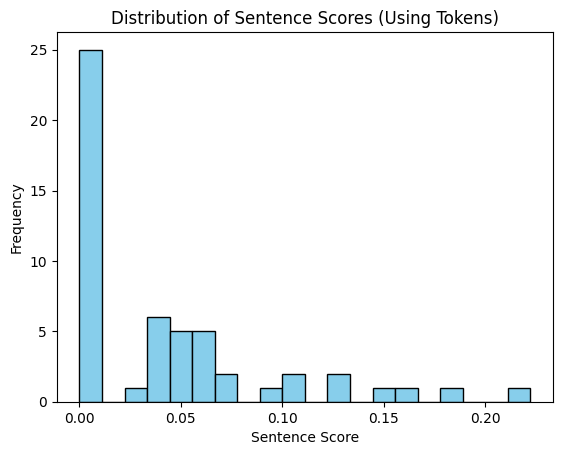

In [46]:
import matplotlib.pyplot as plt

# List containing the scores of every sentence in the article
sentence_scores = []

# Process each sentence in the article
for sentence in article_content.split("."):
    # Skip empty sentences
    if sentence.strip():
        score = score_sentence_by_token(sentence, frequent_tokens)
        sentence_scores.append(score)

# Plotting the histogram
plt.hist(sentence_scores, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Sentence Scores (Using Tokens)')
plt.xlabel('Sentence Score')
plt.ylabel('Frequency')
plt.show()



In [ ]:
# It seems that the most common range of scores is between 0.0 and 0.1. 
# This range indicates that the majority of sentences in the article have a relatively low density 
# of interesting tokens compared to the total number of words in each sentence.

## Question 7:

7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

#### Question 7 Response & Output:

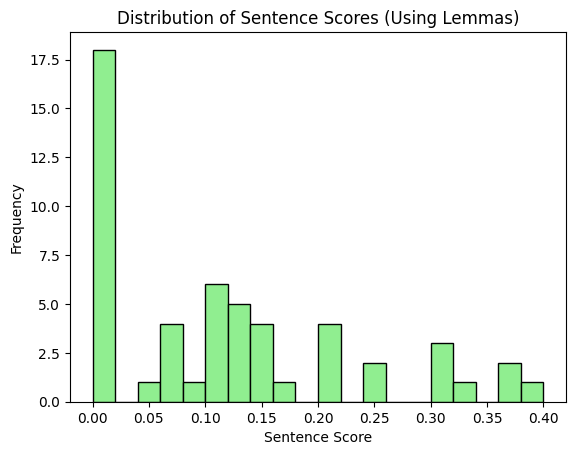

In [47]:
import matplotlib.pyplot as plt

# List containing the scores of every sentence in the article
lemma_sentence_scores = []

# Process each sentence in the article
for sentence in article_content.split("."):
    # Skip empty sentences
    if sentence.strip():
        score = score_sentence_by_lemma(sentence, frequent_lemmas)
        lemma_sentence_scores.append(score)

# Plotting the histogram
plt.hist(lemma_sentence_scores, bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Sentence Scores (Using Lemmas)')
plt.xlabel('Sentence Score')
plt.ylabel('Frequency')
plt.show()


In [51]:
# Most common range of scores (Using Lemmas): 0.0 to 0.1

## Question 8: 

8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).


